# **声音的频谱图**

In [1]:
import pydub
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
from pydub.playback import play

In [9]:
song = AudioSegment.from_wav(songpath)
seg = song[1000:1200]

In [18]:
x, sr = librosa.load('audio/seg.wav', sr=44100, mono=True)

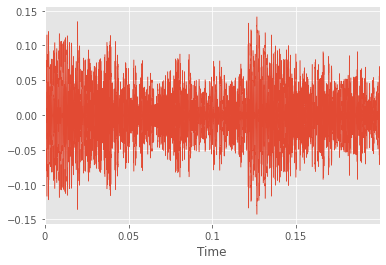

In [134]:
librosa.display.waveplot(x,sr=sr)

In [141]:
X0 = np.fft.fft(x)

In [142]:
len(X0)   # sr * 0.2s=8820 samples/frames

8820

In [144]:
X1 = np.abs(X0)[0:4410]

In [149]:
f_vec0 = np.arange(4410)*sr/8820

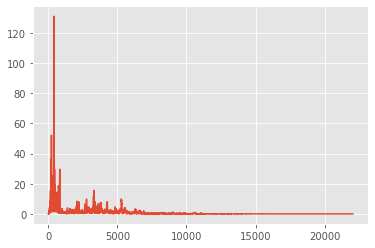

In [150]:
plt.plot(f_vec0,X1)

In [160]:
np.shape(X1)

(4410,)

</br>
</br>

**线性频谱**

In [153]:
num_bins = 30
step = 147  #4410/30
f_vec1 = f_vec0[0::step].astype('str')
X2 = np.mean(X1.reshape(-1,step),axis=1)

<BarContainer object of 30 artists>

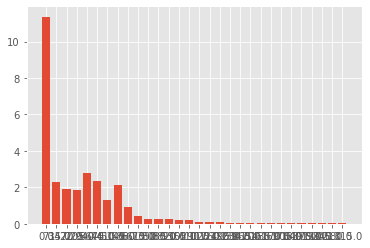

In [155]:
plt.bar(f_vec1, X2)      # 30个 bar（bin）

</br>
</br>

**对数频谱**

In [211]:
f_vec2 = []
for i in np.arange(12):    
    f_vec2.append(int(4410/2**i))

f_vec2.reverse()


In [212]:
f_vec2

[2, 4, 8, 17, 34, 68, 137, 275, 551, 1102, 2205, 4410]

In [217]:
i=0
start_vec = [0]
while i < 11:
    start_vec.append(f_vec2[i]+1)
    i=i+1
    
 

In [218]:
start_vec

[0, 3, 5, 9, 18, 35, 69, 138, 276, 552, 1103, 2206]

In [240]:
X3 = []
i=0
while i < 12:
    start_index=start_vec[i]
    end_index=f_vec2[i]
    XX = np.mean(X1[start_index:end_index])
    X3.append(XX)
    i=i+1
    
    

In [244]:
label =  ["%.2f" % number for number in f_vec2]

<BarContainer object of 12 artists>

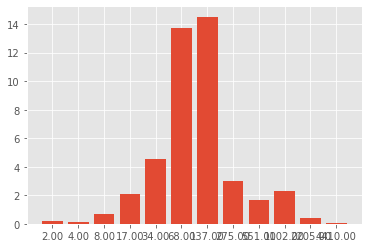

In [246]:
plt.bar(label,X3)